In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import shap

In [ ]:
df = pd.read_excel("gold_futures.xlsx")


In [ ]:
df.head()

Date         Open         High          Low        Close    Adj Close  \
0 2020-01-02  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
1 2020-01-03  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2 2020-01-06  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
3 2020-01-07  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
4 2020-01-08  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

   Volume Price Movement  
0     214             Up  
1     107             Up  
2     416             Up  
3      47             Up  
4     236           Down

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

Date         Open         High          Low        Close    Adj Close  \
0 2020-01-02  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000   
1 2020-01-03  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951   
2 2020-01-06  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951   
3 2020-01-07  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049   
4 2020-01-08  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024   

   Volume Price Movement  Year  Month  Day  
0     214             Up  2020      1    2  
1     107             Up  2020      1    3  
2     416             Up  2020      1    6  
3      47             Up  2020      1    7  
4     236           Down  2020      1    8

In [ ]:
df.drop('Date', axis=1, inplace=True)
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

  Price Movement  Year  Month  Day  
0             Up  2020      1    2  
1             Up  2020      1    3  
2             Up  2020      1    6  
3             Up  2020      1    7  
4           Down  2020      1    8

In [ ]:
label_encoder = LabelEncoder()
df['Price Movement'] = label_encoder.fit_transform(df['Price Movement'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day  
0               1  2020      1    2  
1               1  2020      1    3  
2               1  2020      1    6  
3               1  2020      1    7  
4               0  2020      1    8

In [ ]:
X= df.drop(['Price Movement'], axis=1)
y = df['Price Movement']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.7108433734939759

In [ ]:
det = DecisionTreeClassifier(random_state=42)
det.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
det_predictions = det.predict(X_test)


In [ ]:
det_accuracy = accuracy_score(y_test, det_predictions)
det_accuracy

0.6827309236947792

## SHAP

## summary plot random forest

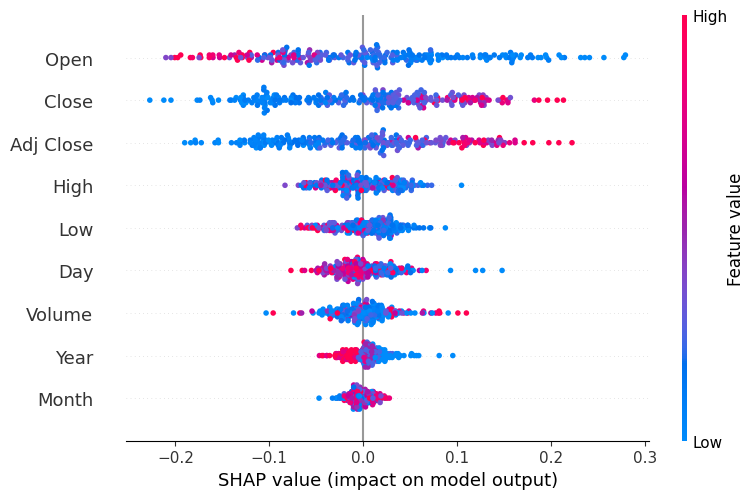

In [ ]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[..., 1], X_test)

### Summary plot Decision Tree

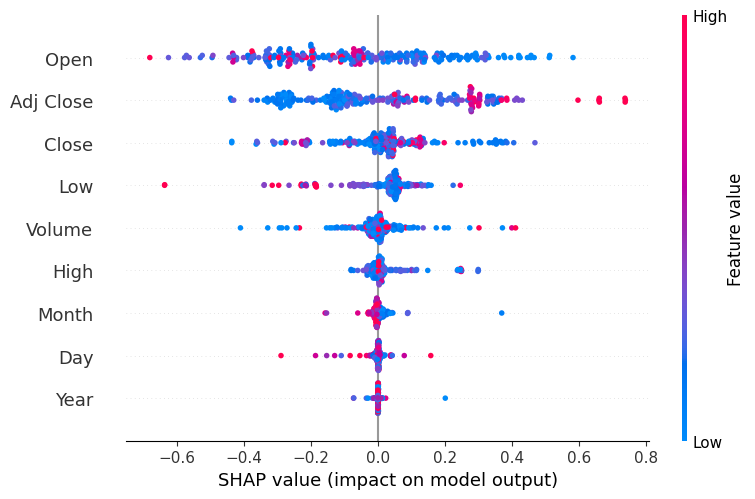

In [ ]:
explainer = shap.TreeExplainer(det)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[..., 1], X_test)

## Extracting Samples

### Sample One

In [ ]:
sampleOne = X_test.iloc[0:1]
sampleOne

Open    High          Low        Close    Adj Close  Volume  Year  \
735  1795.699951  1808.0  1764.300049  1767.400024  1767.400024    1713  2022   

     Month  Day  
735     12    5

In [ ]:
prediction = rf_model.predict(sampleOne)[0]
prediction_result = "UP" if prediction == 1 else "Down"
prediction_result

'Down'

In [ ]:
prediction = det.predict(sampleOne)[0]
prediction_result = "UP" if prediction == 1 else "Down"
prediction_result

'Down'

### Sample Two

In [ ]:
sampleTwo = X_test.iloc[10:11]
sampleTwo

Open         High          Low        Close    Adj Close  Volume  \
937  1871.599976  1871.599976  1871.599976  1871.599976  1871.599976   12251   

     Year  Month  Day  
937  2023      9   27

In [ ]:
prediction = rf_model.predict(sampleTwo)[0]
prediction_result = "UP" if prediction == 1 else "Down"
prediction_result

'UP'

In [ ]:
prediction = det.predict(sampleTwo)[0]
prediction_result = "UP" if prediction == 1 else "Down"
prediction_result

'UP'

### Shap in Random Forest

#### Sample One

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf_model)

In [ ]:
shap_values_sampleOne = explainer.shap_values(sampleOne)
shap_values_sampleOne

array([[[ 0.02589392, -0.02589392],
        [ 0.04952224, -0.04952224],
        [ 0.01711809, -0.01711809],
        [ 0.12231756, -0.12231756],
        [ 0.11122171, -0.11122171],
        [ 0.00218591, -0.00218591],
        [-0.00686568,  0.00686568],
        [-0.0065868 ,  0.0065868 ],
        [-0.03340134,  0.03340134]]])

In [ ]:
 X_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

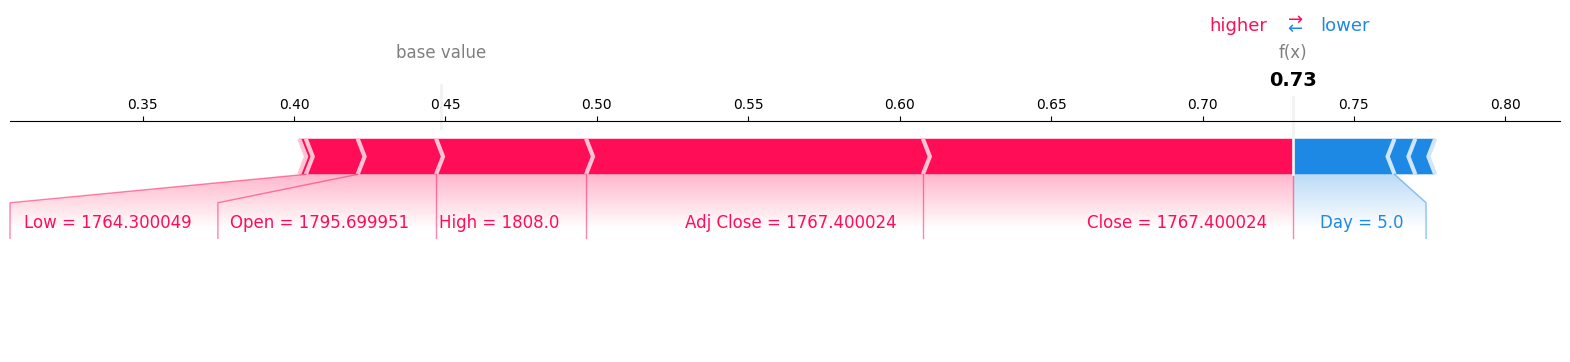

In [ ]:
shap.plots.force(
    base_value=explainer.expected_value[0],
    shap_values=shap_values_sampleOne[..., 0],
    features=sampleOne.values[0],
    feature_names=X_test.columns,
    matplotlib=True
)



For this sample the two features which is close and adj close is the two featuers that pushes the decision to down and it's the most feature contribute to the sample to become down. so let's write down, how each feature pushes and by which value.

Open pusehs to down by 0.02589392

High pushes to down by 0.04952224

Low pushes to down by 0.01711809

Close pushes to down by 0.122317

Adj Close pushes to down by 0.111221

Volume pushes to down by 0.002185

Year pushes to up by 0.00686568

Month pushes to up by 0.0065868

Day pushes to up by 0.03340134

#### Sample Two

In [ ]:
shap_values_sampleTwo = explainer.shap_values(sampleTwo)
shap_values_sampleTwo

array([[[-0.0177196 ,  0.0177196 ],
        [-0.05136071,  0.05136071],
        [-0.02694808,  0.02694808],
        [-0.03770568,  0.03770568],
        [-0.03047774,  0.03047774],
        [-0.08082331,  0.08082331],
        [ 0.00714001, -0.00714001],
        [-0.01789003,  0.01789003],
        [ 0.00719077, -0.00719077]]])

In [ ]:
 X_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

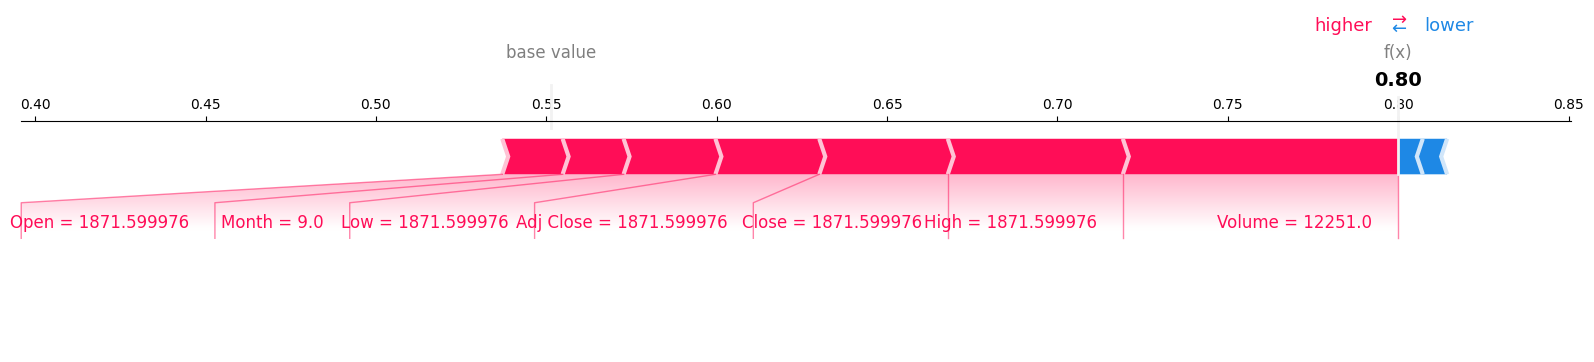

In [ ]:
shap.plots.force(
    base_value=explainer.expected_value[1],
    shap_values=shap_values_sampleTwo[..., 1],
    features=sampleTwo.values[0],
    feature_names=X_test.columns,
    matplotlib=True
)


For this sample the two features which is close and adj close is the two featuers that pushes the decision to Up and it's the most feature contribute to the sample to become up. so let's write down, how each feature pushes and by which value.

Open pusehs to up by 0.01771

High pushes to up by 0.05136

Low pushes to up by 0.02694

Close pushes to up by 0.0377

Adj Close pushes to up by 0.0304

Volume pushes to up by 0.0808

Year pushes to down by 0.00714

Month pushes to up by 0.00178

Day pushes to down by 0.00719

## Shap in Decision Tree

### Sample One

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer_decision = shap.TreeExplainer(det)

In [ ]:
shap_values_sampleOne = explainer_decision.shap_values(sampleOne)
shap_values_sampleOne

array([[[ 0.20300687, -0.20300687],
        [ 0.02353425, -0.02353425],
        [-0.05416572,  0.05416572],
        [ 0.03094359, -0.03094359],
        [ 0.3130467 , -0.3130467 ],
        [ 0.02141959, -0.02141959],
        [ 0.00050652, -0.00050652],
        [ 0.00519139, -0.00519139],
        [ 0.00972967, -0.00972967]]])

In [ ]:
 X_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

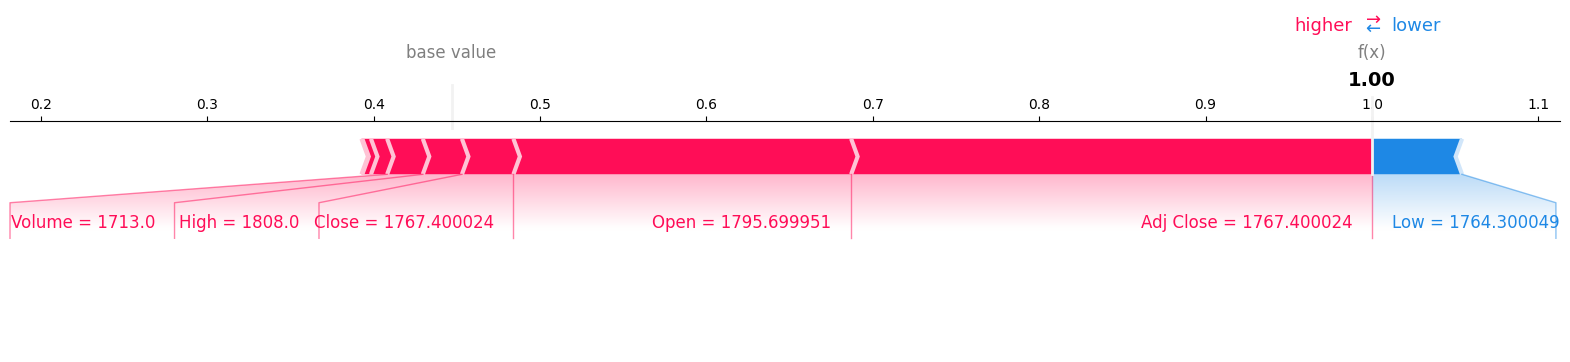

In [ ]:
shap.plots.force(
    base_value=explainer_decision.expected_value[0],
    shap_values=shap_values_sampleOne[..., 0],
    features=sampleOne.values[0],
    feature_names=X_test.columns,
    matplotlib=True
)

Open pushes to Down by 0.20301

High pushes to Down by 0.02353

Low pushes to Up by 0.05417

Close pushes to Down by 0.03094

Adj Close pushes to Down by 0.31305

Volume pushes to Down by 0.02142

Year pushes to Down by 0.00051

Month pushes to Down by 0.00519

Day pushes to Down by 0.00973

### Sample Two

In [ ]:
shap_values_sampleTwo = explainer_decision.shap_values(sampleTwo)
shap_values_sampleTwo

array([[[-0.01860509,  0.01860509],
        [-0.0350588 ,  0.0350588 ],
        [-0.03681782,  0.03681782],
        [-0.04543196,  0.04543196],
        [-0.01478046,  0.01478046],
        [-0.30102855,  0.30102855],
        [-0.00049554,  0.00049554],
        [ 0.00332402, -0.00332402],
        [ 0.00210704, -0.00210704]]])

In [ ]:
 X_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')

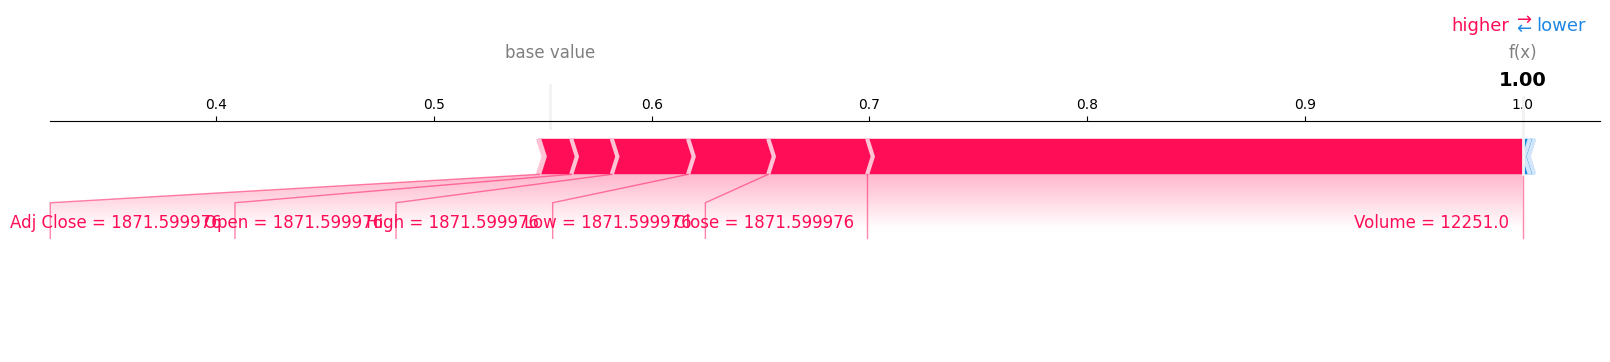

In [ ]:
shap.plots.force(
    base_value=explainer_decision.expected_value[1],
    shap_values=shap_values_sampleTwo[..., 1],
    features=sampleTwo.values[0],
    feature_names=X_test.columns,
    matplotlib=True
)


Open pushes to UP by 0.01860509

High pushes to UP by  0.0350588

Low pushes to UP by 0.03681782

Close pushes to UP by  0.04543196

Adj Close pushes to UP by 0.01478046

Volume pushes to UP by  0.30102855

Year pushes to UP by  0.00049554

Month pushes to UP by 0.00332402

Day pushes to UP by 0.00210704

## Lime

### Random Forest

#### Sample One

In [ ]:
!pip install lime
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns,
    class_names=["Down", "Up"],
    mode='classification'
)



exp_one = explainer.explain_instance(
    sampleOne.values[0],
    lambda x: rf_model.predict_proba(pd.DataFrame(x, columns=X_train.columns))
)

print("Explanation for SampleOne:")
exp_one.show_in_notebook(show_all=True)

Explanation for SampleOne:


In [ ]:
explanation_list = exp_one.as_list()
explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Contribution'])
explanation_df

Feature  Contribution
0       Adj Close <= 1776.67     -0.175275
1           Close <= 1776.67     -0.165046
2  1779.35 < Open <= 1871.05      0.051067
3             Low <= 1769.55      0.030118
4            Volume > 666.00      0.029652
5  2021.00 < Year <= 2022.00      0.004517
6                Day <= 8.00      0.003251
7               Month > 9.00     -0.001951
8  1787.07 < High <= 1877.25     -0.001185

Close pushes to down by 0.184648

Adj Close pushes to down by 0.169741

Open pushes to up by 0.043888

Low pushes to up by 0.038294

Volume pushes to up by 0.020806

Day pushes to up by 0.019664

High pushes to down by 0.007032

Year pushes to up by 0.006414

Month pushes to up by 0.001397


#### Sample Two

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns,
    class_names=["Down", "Up"],
    mode='classification'
)


exp_two = explainer.explain_instance(
    sampleTwo.values[0],
    lambda x: rf_model.predict_proba(pd.DataFrame(x, columns=X_train.columns))
)

print("Explanation for sampleTwo:")
exp_two.show_in_notebook(show_all=True)




Explanation for sampleTwo:


In [ ]:
explanation_list_two = exp_two.as_list()
explanation_df = pd.DataFrame(explanation_list_two, columns=['Featur   e', 'Contribution'])
explanation_df

Featur   e  Contribution
0       1871.05 < Open <= 1988.70     -0.091664
1      1871.00 < Close <= 1986.23      0.066756
2  1871.00 < Adj Close <= 1986.23      0.052041
3                 Volume > 666.00      0.023498
4        1865.15 < Low <= 1979.12     -0.017033
5            6.00 < Month <= 9.00      0.014951
6       2022.00 < Year <= 2023.00     -0.012043
7                     Day > 23.00     -0.009717
8       1787.07 < High <= 1877.25      0.004197

Open                  pushes down by 0.083472
Adj Close             pushes up by 0.066665
Close                 pushes up by 0.058472
Volume                pushes up by 0.029011
Low                   pushes down by 0.019220
Day                   pushes down by 0.012484
Month                 pushes up by 0.011487
Year                  pushes up by 0.005720
High                  pushes up by 0.002742


## Decision Tree

### Sample One

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns,
    class_names=["Down", "Up"],
    mode='classification'
)



exp_one = explainer.explain_instance(
    sampleOne.values[0],
    lambda x: det.predict_proba(pd.DataFrame(x, columns=X_train.columns))
)

print("Explanation for SampleOne:")
exp_one.show_in_notebook(show_all=True)

Explanation for SampleOne:


In [ ]:
explanation_list = exp_one.as_list()
explanation_df = pd.DataFrame(explanation_list, columns=['Feature', 'Contribution'])
explanation_df

Feature  Contribution
0       Adj Close <= 1776.67     -0.221935
1           Close <= 1776.67     -0.197936
2  1779.35 < Open <= 1871.05      0.124786
3             Low <= 1769.55      0.061541
4  1787.07 < High <= 1877.25     -0.041455
5               Month > 9.00     -0.021178
6  2021.00 < Year <= 2022.00     -0.018644
7            Volume > 666.00      0.017026
8                Day <= 8.00      0.012566


Adj Close  pushes down by 0.200303

Close      pushes down by 0.189699

Open  pushes up by 0.155011

Low          pushes up by 0.055894

 High  pushes down by 0.033193

 Year pushes down by 0.023833

Volume     pushes up by 0.022362

Day          pushes up by 0.003262

Month            pushes up by 0.000263


### Sample Two

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns,
    class_names=["Down", "Up"],
    mode='classification'
)


exp_two = explainer.explain_instance(
    sampleTwo.values[0],
    lambda x: det.predict_proba(pd.DataFrame(x, columns=X_train.columns))
)

print("Explanation for sampleTwo:")
exp_two.show_in_notebook(show_all=True)




Explanation for sampleTwo:


In [ ]:
explanation_list_two = exp_two.as_list()
explanation_df = pd.DataFrame(explanation_list_two, columns=['Featur   e', 'Contribution'])
explanation_df

Featur   e  Contribution
0       1871.05 < Open <= 1988.70     -0.162863
1      1871.00 < Close <= 1986.23      0.104274
2                 Volume > 666.00      0.047517
3                     Day > 23.00     -0.035819
4       1787.07 < High <= 1877.25     -0.019642
5        1865.15 < Low <= 1979.12     -0.017986
6            6.00 < Month <= 9.00      0.004583
7  1871.00 < Adj Close <= 1986.23      0.001567
8       2022.00 < Year <= 2023.00      0.000196

For this sample, the two features "Open" and "Adj Close" significantly influence the decision. Here's how each feature contributes to the decision with the corresponding value:

Open pushes the decision down by 0.104731.

High pushes the decision down by 0.042738.

Low pushes the decision up by 0.016987.

Close pushes the decision up by 0.088006.

Adj Close pushes the decision down by 0.019559.

Volume pushes the decision up by 0.022605.

Year pushes the decision down by 0.008016.

Month pushes the decision up by 0.015448.

Day pushes the decision up by 0.001534.


## Comparing Between Shap & Lime

### Random Forest

#### Sample One

For the Shap the features:

Open pusehs to down by 0.02589392

High pushes to down by 0.04952224

Low pushes to down by 0.01711809

Close pushes to down by 0.122317

Adj Close pushes to down by 0.111221

Volume pushes to down by 0.002185

Year pushes to up by 0.00686568

Month pushes to up by 0.0065868

Day pushes to up by 0.03340134

so the most features that are pushes to down are Close, Adj Close, High. and that pushes Up Day, Year, and Month.

for Lime for the same sample and same model here is the result:

Close pushes to down by 0.184648

Adj Close pushes to down by 0.169741

Open pushes to up by 0.043888

Low pushes to up by 0.038294

Volume pushes to up by 0.020806

Day pushes to up by 0.019664

High pushes to down by 0.007032

Year pushes to up by 0.006414

Month pushes to up by 0.001397

so the most features that are pushes to down are close, adj close. and that pushes to up Open, Low, Volume.

so the differene for this sample between the Shap and Lime:

1 - Open feature in the Shap pushes to down, but in Lime  pushes to up.

2- Low feature in the Shap pushes to down, but in the Lime pushes to up.

3- Volume feature in the shap pushes to down, but in the Lime pushes to up.

4- The difference is in the value of each feature in the Lime & shap for each feature also.

the Similarity between Shap and Lime:

is that the most two significant features Pushes to down are Close, Adj Close. and the most one pushes to up is Day

#### Sample Two

For this Sample on Shap the features:

Open pusehs to up by 0.01771

High pushes to up by 0.05136

Low pushes to up by 0.02694

Close pushes to up by 0.0377

Adj Close pushes to up by 0.0304

Volume pushes to up by 0.0808

Year pushes to down by 0.00714

Month pushes to up by 0.00178

Day pushes to down by 0.00719

so the most features that pushes to up is the volume, high, close. and the most features that only two features that is pushes to down is year and day.

For the same sample with the same model the Lime gives this results:

Open pushes down by 0.083472

Adj Close pushes up by 0.066665

Close pushes up by 0.058472

Volume pushes up by 0.029011

Low pushes down by 0.019220

Day pushes down by 0.012484

Month pushes up by 0.011487

Year pushes up by 0.005720

High pushes up by 0.002742

so the most feature that are pushes to up adj close, close, volume. the most features that pushes to down open, low then day.

the differences between the shap and lime in this sample is:

1- there are two features only that pushes the sample to down in shap, the two features are year, day. on Lime there are three features that pushes to down they are open,low,day.

2- the values are different the most feature that pushes to up on shap is volume on other hand the lime the most feature that pushes to up is adj close.

3- the most feature that pushes to down on shap is day and year , on lime is open.


## Decision Tree

### Sample One

for this sample on decision tree the shap features was:

Open pushes to Down by 0.20301

High pushes to Down by 0.02353

Low pushes to Up by 0.05417

Close pushes to Down by 0.03094

Adj Close pushes to Down by 0.31305

Volume pushes to Down by 0.02142

Year pushes to Down by 0.00051

Month pushes to Down by 0.00519

Day pushes to Down by 0.00973

the two features that pushes to up is low, low. the most features that pushes to down are adj close and close.

for the same sample on the same model on lime:


Adj Close  pushes down by 0.200303

Close pushes down by 0.189699

Open  pushes up by 0.155011

Low pushes up by 0.055894

High  pushes down by 0.033193

Year pushes down by 0.023833

Volume  pushes up by 0.022362

Day pushes up by 0.003262

Month  pushes up by 0.000263

the most features that pushes to up low, volume, open. the most features that pushes to down close, adj close.

The differences between Shap and Lime on this sample:

1- The only feature that pushes to up on shap is low. there are a lot of features that pushes to up on lime (open, low, volume, day, month).

2- The value for each feature is different in shap and lime.

3- open pushes strongly to down on shap, but on lime open pushes to up strongly.


### Sample Two

for this sample on decsion tree the shap explaines the features as follow:

Open pushes to UP by 0.01860509

High pushes to UP by  0.0350588

Low pushes to UP by 0.03681782

Close pushes to UP by  0.04543196

Adj Close pushes to UP by 0.01478046

Volume pushes to UP by  0.30102855

Year pushes to UP by  0.00049554

Month pushes to UP by 0.00332402

Day pushes to UP by 0.00210704

all the features pushes to up, the most feature pushes to up is close.

for the same  sample and the same model:

Open pushes the decision down by 0.104731.

High pushes the decision down by 0.042738.

Low pushes the decision up by 0.016987.

Close pushes the decision up by 0.088006.

Adj Close pushes the decision down by 0.019559.

Volume pushes the decision up by 0.022605.

Year pushes the decision down by 0.008016.

Month pushes the decision up by 0.015448.

Day pushes the decision up by 0.001534.

The most two features that pushes to down are open and high. The most features that pushes to up are close, volume.

The difference between shap and lime on this sample:

1- different values in shap and lime.

2- There is no features that pushes to down on shap, there are 4 features that pushes to down on lime (open , high, adj close, year)


# Model Bais

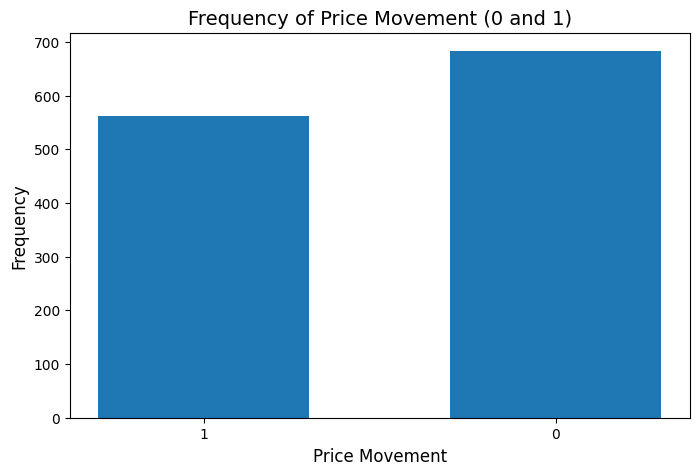

In [ ]:
import matplotlib.pyplot as plt

counts = df['Price Movement'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(counts.index, counts.values, width=0.6, tick_label=['0', '1'])

plt.title('Frequency of Price Movement (0 and 1)', fontsize=14)
plt.xlabel('Price Movement', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


## Binning

First, let's bin all the continuous features into ca

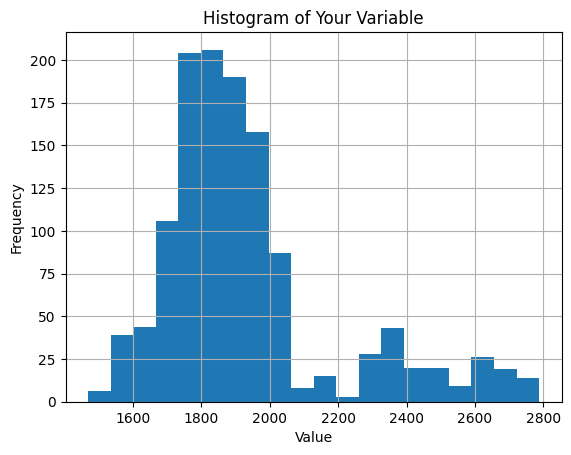

In [ ]:
df['Open'].hist(bins=20)
plt.title('Histogram of Your Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_open_25 =  np.percentile(df['Open'], 25)
p_open_75 =  np.percentile(df['Open'], 75)


In [ ]:
df['Open_categorical'] = pd.cut(df['Open'], bins=[min(df['Open'])-1, p_open_25, p_open_75, float('inf')], labels=['Low', 'Mid', 'High'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical  
0               1  2020      1    2              Low  
1               1  2020      1    3              Low  
2               1  2020      1    6              Low  
3               1  2020      1    7              Low  
4               0  2020      1    8              Low

Let's do this for all the features

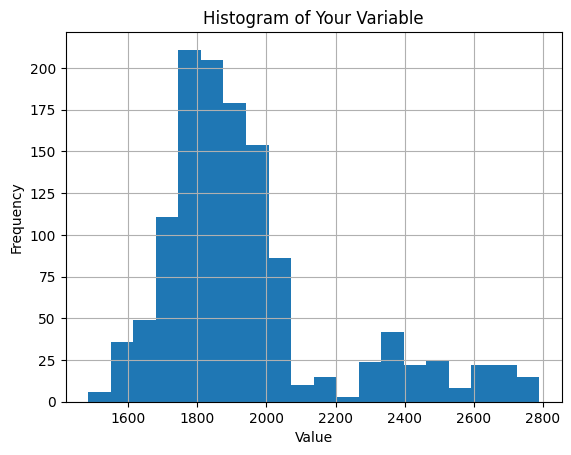

In [ ]:
df['High'].hist(bins=20)
plt.title('Histogram of Your Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_High_25 =  np.percentile(df['High'], 25)
p_High_75 =  np.percentile(df['High'], 75)

In [ ]:
df['High_categorical'] = pd.cut(df['High'], bins=[min(df['High'])-1, p_High_25, p_High_75, float('inf')], labels=['Low', 'Mid', 'High'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical High_categorical  
0               1  2020      1    2              Low              Low  
1               1  2020      1    3              Low              Low  
2               1  2020      1    6              Low              Low  
3               1  2020      1    7              Low              Low  
4               0  2020      1    8              Low              Low

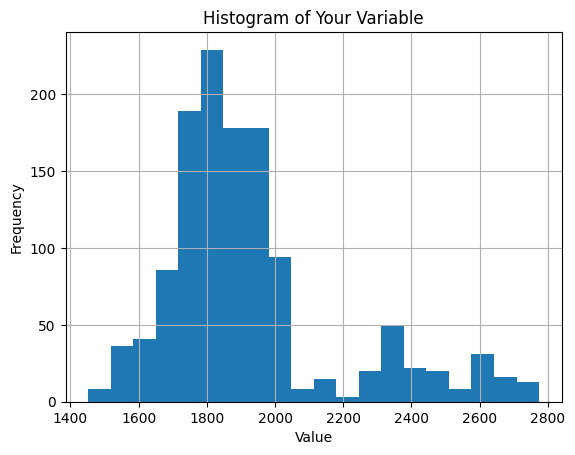

In [ ]:
df['Low'].hist(bins=20)
plt.title('Histogram of Your Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_Low_25 =  np.percentile(df['Low'], 25)
p_Low_75 =  np.percentile(df['Low'], 75)

In [ ]:
df['Low_categorical'] = pd.cut(df['Low'], bins=[min(df['Low'])-1, p_Low_25, p_Low_75, float('inf')], labels=['Low', 'Mid', 'High'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical High_categorical  \
0               1  2020      1    2              Low              Low   
1               1  2020      1    3              Low              Low   
2               1  2020      1    6              Low              Low   
3               1  2020      1    7              Low              Low   
4               0  2020      1    8              Low              Low   

  Low_categorical  
0             Low  
1             Low  
2             Low  
3             Low  
4             Low

In [ ]:
df.tail()

Open         High          Low        Close    Adj Close  Volume  \
1240  2662.300049  2698.199951  2661.000000  2697.600098  2697.600098     437   
1241  2701.800049  2733.800049  2693.100098  2733.800049  2733.800049    3387   
1242  2725.100098  2725.100098  2677.399902  2687.500000  2687.500000    2365   
1243  2688.199951  2689.300049  2647.899902  2656.000000  2656.000000    1125   
1244  2658.300049  2663.300049  2651.000000  2651.399902  2651.399902    1125   

      Price Movement  Year  Month  Day Open_categorical High_categorical  \
1240               1  2024     12   10             High             High   
1241               1  2024     12   11             High             High   
1242               0  2024     12   12             High             High   
1243               0  2024     12   13             High             High   
1244               0  2024     12   16             High             High   

     Low_categorical  
1240            High  
1241            High  
1242            High  
1243            High  
1244            High

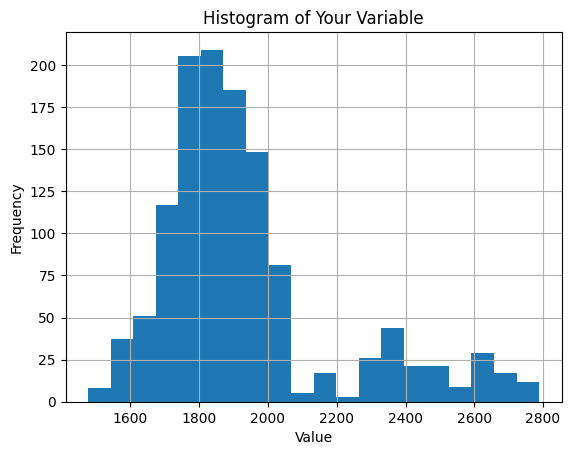

In [ ]:
df['Close'].hist(bins=20)
plt.title('Histogram of Your Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_Close_25 =  np.percentile(df['Close'], 25)
p_Close_75 =  np.percentile(df['Close'], 75)

In [ ]:
df['Close_categorical'] = pd.cut(df['Close'], bins=[min(df['Close'])-1, p_Close_25, p_Close_75, float('inf')], labels=['Low', 'Mid', 'High'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical High_categorical  \
0               1  2020      1    2              Low              Low   
1               1  2020      1    3              Low              Low   
2               1  2020      1    6              Low              Low   
3               1  2020      1    7              Low              Low   
4               0  2020      1    8              Low              Low   

  Low_categorical Close_categorical  
0             Low               Low  
1             Low               Low  
2             Low               Low  
3             Low               Low  
4             Low               Low

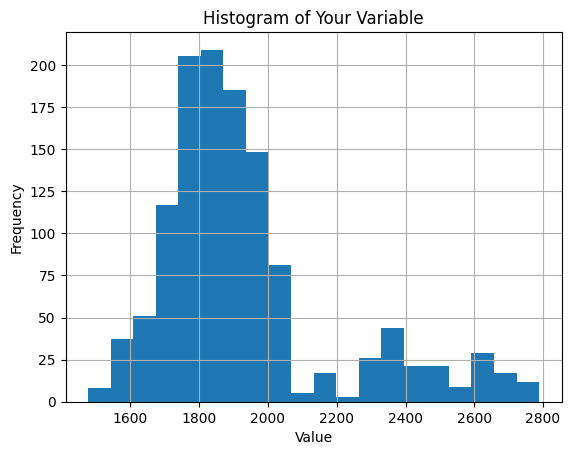

In [ ]:
df['Adj Close'].hist(bins=20)
plt.title('Histogram of Your Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_adj_Close_25 =  np.percentile(df['Adj Close'], 25)
p_adj_Close_75 =  np.percentile(df['Adj Close'], 75)

In [ ]:
df['Adj_Close_categorical'] = pd.cut(df['Adj Close'], bins=[min(df['Adj Close'])-1, p_adj_Close_25, p_adj_Close_75, float('inf')], labels=['Low', 'Mid', 'High'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical High_categorical  \
0               1  2020      1    2              Low              Low   
1               1  2020      1    3              Low              Low   
2               1  2020      1    6              Low              Low   
3               1  2020      1    7              Low              Low   
4               0  2020      1    8              Low              Low   

  Low_categorical Close_categorical Adj_Close_categorical  
0             Low               Low                   Low  
1             Low               Low                   Low  
2             Low               Low                   Low  
3             Low               Low                   Low  
4             Low               Low                   Low

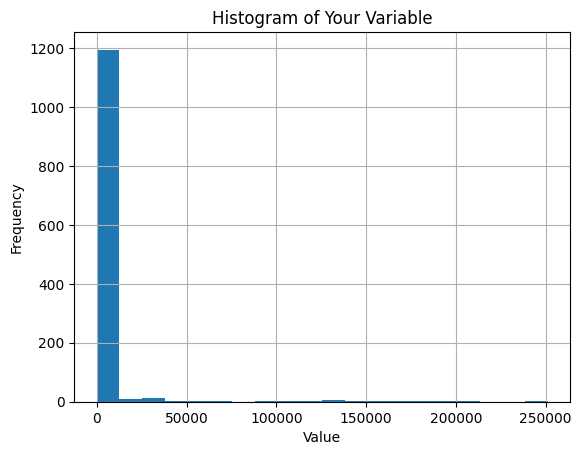

In [ ]:
df['Volume'].hist(bins=20)
plt.title('Histogram of Your Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
p_volume_25 =  np.percentile(df['Volume'], 25)
p_volume_75 =  np.percentile(df['Volume'], 75)

In [ ]:
df['Volume_categorical'] = pd.cut(df['Volume'], bins=[min(df['Volume'])-1, p_volume_25, p_volume_75, max(df['Volume'])], labels=['Low', 'Mid', 'High'])
df.head()

Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical High_categorical  \
0               1  2020      1    2              Low              Low   
1               1  2020      1    3              Low              Low   
2               1  2020      1    6              Low              Low   
3               1  2020      1    7              Low              Low   
4               0  2020      1    8              Low              Low   

  Low_categorical Close_categorical Adj_Close_categorical Volume_categorical  
0             Low               Low                   Low                Mid  
1             Low               Low                   Low                Mid  
2             Low               Low                   Low                Mid  
3             Low               Low                   Low                Low  
4             Low               Low                   Low                Mid

No we have all the features as a categorical features let's see the fairnees of each one

### DIR

In [ ]:
favorable_outcomes = df[df['Price Movement'] == 1]
favorable_outcomes

Open         High          Low        Close    Adj Close  Volume  \
0     1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1     1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2     1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3     1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
6     1551.199951  1558.800049  1545.400024  1557.500000  1557.500000      16   
...           ...          ...          ...          ...          ...     ...   
1236  2639.199951  2658.300049  2637.000000  2653.800049  2653.800049     249   
1238  2620.199951  2643.100098  2617.500000  2638.600098  2638.600098     571   
1239  2632.100098  2677.100098  2630.800049  2664.899902  2664.899902     935   
1240  2662.300049  2698.199951  2661.000000  2697.600098  2697.600098     437   
1241  2701.800049  2733.800049  2693.100098  2733.800049  2733.800049    3387   

      Price Movement  Year  Month  Day Open_categorical High_categorical  \
0                  1  2020      1    2              Low              Low   
1                  1  2020      1    3              Low              Low   
2                  1  2020      1    6              Low              Low   
3                  1  2020      1    7              Low              Low   
6                  1  2020      1   10              Low              Low   
...              ...   ...    ...  ...              ...              ...   
1236               1  2024     12    4             High             High   
1238               1  2024     12    6             High             High   
1239               1  2024     12    9             High             High   
1240               1  2024     12   10             High             High   
1241               1  2024     12   11             High             High   

     Low_categorical Close_categorical Adj_Close_categorical  \
0                Low               Low                   Low   
1                Low               Low                   Low   
2                Low               Low                   Low   
3                Low               Low                   Low   
6                Low               Low                   Low   
...              ...               ...                   ...   
1236            High              High                  High   
1238            High              High                  High   
1239            High              High                  High   
1240            High              High                  High   
1241            High              High                  High   

     Volume_categorical  
0                   Mid  
1                   Mid  
2                   Mid  
3                   Low  
6                   Low  
...                 ...  
1236                Mid  
1238                Mid  
1239               High  
1240                Mid  
1241               High  

[683 rows x 16 columns]

#### Open Bais

In [ ]:
favorable_by_category = favorable_outcomes['Open_categorical'].value_counts()
favorable_by_category

Open_categorical
Mid     328
High    180
Low     175
Name: count, dtype: int64

In [ ]:
total_by_category = df['Open_categorical'].value_counts()
total_by_category

Open_categorical
Mid     622
Low     312
High    311
Name: count, dtype: int64

In [ ]:
favorable_rate = favorable_by_category / total_by_category
favorable_rate


Open_categorical
Low     0.560897
Mid     0.527331
High    0.578778
Name: count, dtype: float64

In [ ]:
dir_low_mid = favorable_rate['Low'] / favorable_rate['Mid']
dir_low_mid

1.0636530644152598

In [ ]:
dir_low_high = favorable_rate['Low'] / favorable_rate['High']
dir_low_high

0.9691061253561254

In [ ]:
dir_mid_high = favorable_rate['Mid'] / favorable_rate['High']
dir_mid_high

0.9111111111111111

In [ ]:
dir_mid_low = favorable_rate['Mid'] / favorable_rate['Low']
dir_mid_low

0.9401561782269177

In [ ]:
dir_high_low = favorable_rate['High'] / favorable_rate['Low']
dir_high_low

1.0318787322002756

In [ ]:
dir_high_mid = favorable_rate['High'] / favorable_rate['Mid']
dir_high_mid

1.0975609756097562

#### High Bias

In [ ]:
favorable_by_category_High = favorable_outcomes['High_categorical'].value_counts()
favorable_by_category_High

High_categorical
Mid     334
High    181
Low     168
Name: count, dtype: int64

In [ ]:
total_by_category_High = df['High_categorical'].value_counts()
total_by_category_High

High_categorical
Mid     622
Low     312
High    311
Name: count, dtype: int64

In [ ]:
favorable_rate_High = favorable_by_category_High / total_by_category_High
favorable_rate_High


High_categorical
Low     0.538462
Mid     0.536977
High    0.581994
Name: count, dtype: float64

In [ ]:
dir_low_mid_High = favorable_rate_High['Low'] / favorable_rate_High['Mid']
dir_low_mid_High

1.0027637033625059

In [ ]:
dir_low_high_High = favorable_rate_High['Low'] / favorable_rate_High['High']
dir_low_high_High

0.9252018699532512

In [ ]:
dir_mid_high_High = favorable_rate_High['Mid'] / favorable_rate_High['High']
dir_mid_high_High

0.9226519337016574

In [ ]:
dir_mid_low_High = favorable_rate_High['Mid'] / favorable_rate_High['Low']
dir_mid_low_High

0.9972439136426274

In [ ]:
dir_high_low_High = favorable_rate_High['High'] / favorable_rate_High['Low']
dir_high_low_High

1.080845199816261

In [ ]:
dir_high_mid_High = favorable_rate_High['High'] / favorable_rate_High['Mid']
dir_high_mid_High

1.0838323353293413

#### Low Bais

In [ ]:
favorable_by_category_Low = favorable_outcomes['Low_categorical'].value_counts()
favorable_by_category_Low


Low_categorical
Mid     340
High    181
Low     162
Name: count, dtype: int64

In [ ]:
total_by_category_Low = df['Low_categorical'].value_counts()
total_by_category_Low


Low_categorical
Mid     622
Low     312
High    311
Name: count, dtype: int64

In [ ]:
favorable_rate_Low = favorable_by_category_Low / total_by_category_Low
favorable_rate_Low


Low_categorical
Low     0.519231
Mid     0.546624
High    0.581994
Name: count, dtype: float64

In [ ]:
dir_low_mid_Low = favorable_rate_Low['Low'] / favorable_rate_Low['Mid']
dir_low_mid_Low

0.9498868778280544

In [ ]:
dir_low_high_Low = favorable_rate_Low['Low'] / favorable_rate_Low['High']
dir_low_high_Low

0.8921589460263495

In [ ]:
dir_mid_high_Low = favorable_rate_Low['Mid'] / favorable_rate_Low['High']
dir_mid_high_Low

0.9392265193370166

In [ ]:
dir_mid_low_Low = favorable_rate_Low['Mid'] / favorable_rate_Low['Low']
dir_mid_low_Low


1.05275693700131

In [ ]:
dir_high_low_Low = favorable_rate_Low['High'] / favorable_rate_Low['Low']
dir_high_low_Low

1.1208765035131594

In [ ]:
dir_high_mid_Low = favorable_rate_Low['High'] / favorable_rate_Low['Mid']
dir_high_mid_Low


1.0647058823529412

#### Close

In [ ]:
favorable_by_category_Close = favorable_outcomes['Close_categorical'].value_counts()
favorable_by_category_Close

Close_categorical
Mid     344
High    185
Low     154
Name: count, dtype: int64

In [ ]:
total_by_category_Close = df['Close_categorical'].value_counts()
total_by_category_Close

Close_categorical
Mid     622
Low     312
High    311
Name: count, dtype: int64

In [ ]:
favorable_rate_Close = favorable_by_category_Close / total_by_category_Close
favorable_rate_Close


Close_categorical
Low     0.493590
Mid     0.553055
High    0.594855
Name: count, dtype: float64

In [ ]:
dir_low_mid_Close = favorable_rate_Close['Low'] / favorable_rate_Close['Mid']
dir_low_mid_Close

0.892479129397734

In [ ]:
dir_low_high_Close = favorable_rate_Close['Low'] / favorable_rate_Close['High']
dir_low_high_Close

0.8297643797643798

In [ ]:
dir_mid_high_Close = favorable_rate_Close['Mid'] / favorable_rate_Close['High']
dir_mid_high_Close


0.9297297297297297

In [ ]:
dir_mid_low_Close = favorable_rate_Close['Mid'] / favorable_rate_Close['Low']
dir_mid_low_Close

1.1204743809245417

In [ ]:
dir_high_low_Close = favorable_rate_Close['High'] / favorable_rate_Close['Low']
dir_high_low_Close

1.2051613980874432

In [ ]:
dir_high_mid_Close = favorable_rate_Close['High'] / favorable_rate_Close['Mid']
dir_high_mid_Close

1.0755813953488373

#### Volume Bais

In [ ]:
favorable_by_category_Volume = favorable_outcomes['Volume_categorical'].value_counts()
favorable_by_category_Volume


Volume_categorical
Mid     341
High    172
Low     170
Name: count, dtype: int64

In [ ]:
total_by_category_Volume = df['Volume_categorical'].value_counts()
total_by_category_Volume

Volume_categorical
Mid     621
Low     313
High    311
Name: count, dtype: int64

In [ ]:
favorable_rate_Volume = favorable_by_category_Volume / total_by_category_Volume
favorable_rate_Volume


Volume_categorical
Low     0.543131
Mid     0.549114
High    0.553055
Name: count, dtype: float64

In [ ]:
dir_low_mid_Volume = favorable_rate_Volume['Low'] / favorable_rate_Volume['Mid']
dir_low_mid_Volume

0.9891036511669304

In [ ]:
dir_low_high_Volume = favorable_rate_Volume['Low'] / favorable_rate_Volume['High']
dir_low_high_Volume

0.9820566163905192

In [ ]:

dir_mid_high_Volume = favorable_rate_Volume['Mid'] / favorable_rate_Volume['High']
dir_mid_high_Volume

0.9928753323596599

In [ ]:
dir_mid_low_Volume = favorable_rate_Volume['Mid'] / favorable_rate_Volume['Low']
dir_mid_low_Volume

1.011016387231221

In [ ]:
dir_high_low_Volume = favorable_rate_Volume['High'] / favorable_rate_Volume['Low']
dir_high_low_Volume

1.018271231322111

In [ ]:
dir_high_mid_Volume = favorable_rate_Volume['High'] / favorable_rate_Volume['Mid']
dir_high_mid_Volume

1.007175792778946

### DP

#### Open

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]

low_positive_rate_open = df[(df['Price Movement'] == 1) & (df['Open_categorical'] == 'Low')].shape[0] / df[df['Open_categorical'] == 'Low'].shape[0]

dp_low_open = low_positive_rate_open / overall_positive_rate

dp_low_open


1.0224265119945941

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]

mid_positive_rate_open = df[(df['Price Movement'] == 1) & (df['Open_categorical'] == 'Mid')].shape[0] / df[df['Open_categorical'] == 'Mid'].shape[0]

dp_mid_open = mid_positive_rate_open / overall_positive_rate

dp_mid_open


0.9612406020347153

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]

high_positive_rate_open = df[(df['Price Movement'] == 1) & (df['Open_categorical'] == 'High')].shape[0] / df[df['Open_categorical'] == 'High'].shape[0]

dp_high_open = high_positive_rate_open / overall_positive_rate

dp_high_open


1.0550201729649316

#### High

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
low_positive_rate_high = df[(df['Price Movement'] == 1) & (df['High_categorical'] == 'Low')].shape[0] / df[df['High_categorical'] == 'Low'].shape[0]
dp_low_high = low_positive_rate_high / overall_positive_rate
dp_low_high


0.9815294515148102

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
mid_positive_rate_high = df[(df['Price Movement'] == 1) & (df['High_categorical'] == 'Mid')].shape[0] / df[df['High_categorical'] == 'Mid'].shape[0]
dp_mid_high = mid_positive_rate_high / overall_positive_rate
dp_mid_high

0.9788242715841309

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
high_positive_rate_high = df[(df['Price Movement'] == 1) & (df['High_categorical'] == 'High')].shape[0] / df[df['High_categorical'] == 'High'].shape[0]
dp_high_high = high_positive_rate_high / overall_positive_rate
dp_high_high


1.06088139614807

#### Low

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
low_positive_rate_low = df[(df['Price Movement'] == 1) & (df['Low_categorical'] == 'Low')].shape[0] / df[df['Low_categorical'] == 'Low'].shape[0]
dp_low_low = low_positive_rate_low / overall_positive_rate
dp_low_low


0.9464748282464243

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
mid_positive_rate_low = df[(df['Price Movement'] == 1) & (df['Low_categorical'] == 'Mid')].shape[0] / df[df['Low_categorical'] == 'Mid'].shape[0]
dp_mid_low = mid_positive_rate_low / overall_positive_rate
dp_mid_low


0.9964079411335465

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
high_positive_rate_low = df[(df['Price Movement'] == 1) & (df['Low_categorical'] == 'High')].shape[0] / df[df['Low_categorical'] == 'High'].shape[0]
dp_high_low = high_positive_rate_low / overall_positive_rate
dp_high_low


1.06088139614807

#### Close

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
low_positive_rate_close = df[(df['Price Movement'] == 1) & (df['Close_categorical'] == 'Low')].shape[0] / df[df['Close_categorical'] == 'Low'].shape[0]
dp_low_close = low_positive_rate_close / overall_positive_rate
dp_low_close


0.8997353305552428

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
mid_positive_rate_close = df[(df['Price Movement'] == 1) & (df['Close_categorical'] == 'Mid')].shape[0] / df[df['Close_categorical'] == 'Mid'].shape[0]
dp_mid_close = mid_positive_rate_close / overall_positive_rate
dp_mid_close


1.0081303874998235

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
high_positive_rate_close = df[(df['Price Movement'] == 1) & (df['Close_categorical'] == 'High')].shape[0] / df[df['Close_categorical'] == 'High'].shape[0]
dp_high_close = high_positive_rate_close / overall_positive_rate
dp_high_close


1.0843262888806242

#### Volume

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
low_positive_rate_volume = df[(df['Price Movement'] == 1) & (df['Volume_categorical'] == 'Low')].shape[0] / df[df['Volume_categorical'] == 'Low'].shape[0]
dp_low_volume = low_positive_rate_volume / overall_positive_rate
dp_low_volume


0.9900411172285397

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
mid_positive_rate_volume = df[(df['Price Movement'] == 1) & (df['Volume_categorical'] == 'Mid')].shape[0] / df[df['Volume_categorical'] == 'Mid'].shape[0]
dp_mid_volume = mid_positive_rate_volume / overall_positive_rate
dp_mid_volume


1.00094779355076

In [ ]:
overall_positive_rate = df[df['Price Movement'] == 1].shape[0] / df.shape[0]
high_positive_rate_volume = df[(df['Price Movement'] == 1) & (df['Volume_categorical'] == 'High')].shape[0] / df[df['Volume_categorical'] == 'High'].shape[0]
dp_high_volume = high_positive_rate_volume / overall_positive_rate
dp_high_volume


1.0081303874998235

## EO

#### encoding all Features

In [ ]:
original_encodings = {
    'Open_categorical': {'Low': 0, 'Mid': 1, 'High': 2},
    'High_categorical': {'Low': 0, 'Mid': 1, 'High': 2},
    'Low_categorical': {'Low': 0, 'Mid': 1, 'High': 2},
    'Close_categorical': {'Low': 0, 'Mid': 1, 'High': 2},
    'Adj_Close_categorical': {'Low': 0, 'Mid': 1, 'High': 2},
    'Volume_categorical': {'Low': 0, 'Mid': 1, 'High': 2}
}
encoded_gold_futures = df.copy()
for column, mapping in original_encodings.items():
    encoded_gold_futures[column] = encoded_gold_futures[column].map(mapping)

encoded_gold_futures.head()


Open         High          Low        Close    Adj Close  Volume  \
0  1518.099976  1528.699951  1518.000000  1524.500000  1524.500000     214   
1  1530.099976  1552.699951  1530.099976  1549.199951  1549.199951     107   
2  1580.000000  1580.000000  1560.400024  1566.199951  1566.199951     416   
3  1558.300049  1576.300049  1558.300049  1571.800049  1571.800049      47   
4  1579.699951  1604.199951  1552.300049  1557.400024  1557.400024     236   

   Price Movement  Year  Month  Day Open_categorical High_categorical  \
0               1  2020      1    2                0                0   
1               1  2020      1    3                0                0   
2               1  2020      1    6                0                0   
3               1  2020      1    7                0                0   
4               0  2020      1    8                0                0   

  Low_categorical Close_categorical Adj_Close_categorical Volume_categorical  
0               0                 0                     0                  1  
1               0                 0                     0                  1  
2               0                 0                     0                  1  
3               0                 0                     0                  0  
4               0                 0                     0                  1

### Build Random Forest Model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)



X_test['y_true'] = y_test
X_test['y_pred'] = y_pred

#### Low

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Low_categorical'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "Low_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'Low_categorical': {'Low': {'TPR': 0.72, 'FPR': 0.26666666666666666},
  'Mid': {'TPR': 0.7524752475247525, 'FPR': 0.4777777777777778},
  'High': {'TPR': 0.7551020408163265, 'FPR': 0.5128205128205128}}}

#### Close

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Close_categorical'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "Close_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'Close_categorical': {'Low': {'TPR': 0.7021276595744681,
   'FPR': 0.2708333333333333},
  'Mid': {'TPR': 0.7572815533980582, 'FPR': 0.4777777777777778},
  'High': {'TPR': 0.76, 'FPR': 0.5277777777777778}}}

#### Open

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Open_categorical'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "Open_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'Open_categorical': {'Low': {'TPR': 0.7358490566037735,
   'FPR': 0.30952380952380953},
  'Mid': {'TPR': 0.7448979591836735, 'FPR': 0.45161290322580644},
  'High': {'TPR': 0.7551020408163265, 'FPR': 0.5128205128205128}}}

#### High

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['High_categorical'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "High_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'High_categorical': {'Low': {'TPR': 0.7083333333333334,
   'FPR': 0.32558139534883723},
  'Mid': {'TPR': 0.7722772277227723, 'FPR': 0.45161290322580644},
  'High': {'TPR': 0.7254901960784313, 'FPR': 0.5}}}

#### Volume

In [ ]:
def calculate_tpr_fpr_volume(group):
    group_data = X_test[X_test['Volume_categorical'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_volume, fpr_low_volume = calculate_tpr_fpr_volume(0)
tpr_mid_volume, fpr_mid_volume = calculate_tpr_fpr_volume(1)
tpr_high_volume, fpr_high_volume = calculate_tpr_fpr_volume(2)

{
    "Volume_categorical": {
        "Low": {"TPR": tpr_low_volume, "FPR": fpr_low_volume},
        "Mid": {"TPR": tpr_mid_volume, "FPR": fpr_mid_volume},
        "High": {"TPR": tpr_high_volume, "FPR": fpr_high_volume}
    }
}


{'Volume_categorical': {'Low': {'TPR': 0.8888888888888888,
   'FPR': 0.5689655172413793},
  'Mid': {'TPR': 0.6796116504854369, 'FPR': 0.34146341463414637},
  'High': {'TPR': 0.75, 'FPR': 0.4117647058823529}}}

There is a bais in Volume and High in the FPR rate and in TPR there is a huge differences between the features I will handle it with

1- preprocessing

2- in processing

3- postprocessing

now we need to remove all continous features and replace it with the categorical feature so we can handle bais

For preprocessing I will do SMOTE

In [ ]:
encoded_gold_futures['Volume'] = encoded_gold_futures['Volume_categorical']

In [ ]:
encoded_gold_futures['Open'] = encoded_gold_futures['Open_categorical']

In [ ]:
encoded_gold_futures['Low'] = encoded_gold_futures['Low_categorical']

In [ ]:
encoded_gold_futures['Close'] = encoded_gold_futures['Close_categorical']

In [ ]:
encoded_gold_futures['High'] = encoded_gold_futures['High_categorical']

In [ ]:
encoded_gold_futures = encoded_gold_futures.drop(['Volume_categorical','Open_categorical','Low_categorical','High_categorical','Close_categorical','Adj_Close_categorical'], axis=1)

In [ ]:
encoded_gold_futures

Open High Low Close    Adj Close Volume  Price Movement  Year  Month  Day
0       0    0   0     0  1524.500000      1               1  2020      1    2
1       0    0   0     0  1549.199951      1               1  2020      1    3
2       0    0   0     0  1566.199951      1               1  2020      1    6
3       0    0   0     0  1571.800049      0               1  2020      1    7
4       0    0   0     0  1557.400024      1               0  2020      1    8
...   ...  ...  ..   ...          ...    ...             ...   ...    ...  ...
1240    2    2   2     2  2697.600098      1               1  2024     12   10
1241    2    2   2     2  2733.800049      2               1  2024     12   11
1242    2    2   2     2  2687.500000      2               0  2024     12   12
1243    2    2   2     2  2656.000000      2               0  2024     12   13
1244    2    2   2     2  2651.399902      2               0  2024     12   16

[1245 rows x 10 columns]

In [ ]:
X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
X_test['y_true'] = y_test
X_test['y_pred'] = y_pred


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("False Positives:", fp)
print("True Positives:", tp)



False Positives: 75
True Positives: 149


In [ ]:
from imblearn.over_sampling import SMOTE
X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

X_test['y_true'] = y_test
X_test['y_pred'] = y_pred


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("False Positives:", fp)
print("True Positives:", tp)



False Positives: 100
True Positives: 112


now let's do a in processing technique

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sample_weights_low = np.where(X_train['Low'] == 0, 1.3,np.where(X_train['Low'] == 1, 3, 1))

sample_weights_close = np.where(X_train['Close'] == 0, 1.5, np.where(X_train['Close'] == 1, 1, 1.0))

sample_weights_high = np.where(X_train['High'] == 0, 1.5, np.where(X_train['High'] == 1, 1, 1.0))

sample_weights_open = np.where(X_train['Open'] == 0, 1,  np.where(X_train['Open'] == 1, 1.3,  1.5))

sample_weights_volume = np.where(X_train['Volume'] == 0, 2,   np.where(X_train['Volume'] == 1, 1.3,  1))


sample_weights_all_features = (sample_weights_low * sample_weights_close * sample_weights_open * sample_weights_high * sample_weights_volume)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train,sample_weight=sample_weights_all_features)

y_pred = rf_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("False Positives:", fp)
print("True Positives:", tp)

report = classification_report(y_test, y_pred, target_names=["Up","Down"])
report


False Positives: 92
True Positives: 118


'              precision    recall  f1-score   support\n\n          Up       0.50      0.47      0.49       174\n        Down       0.56      0.59      0.58       200\n\n    accuracy                           0.53       374\n   macro avg       0.53      0.53      0.53       374\nweighted avg       0.53      0.53      0.53       374\n'

now let's do post processing technique

In [ ]:
X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
X_test['y_true'] = y_test
X_test['y_pred'] = y_pred
X_test['y_pred_proba'] = y_pred_proba
X_test['Volume'] = encoded_gold_futures['Volume'].iloc[X_test.index]

def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Volume'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_volume, fpr_low_volume = calculate_tpr_fpr_volume(0)
tpr_mid_volume, fpr_mid_volume = calculate_tpr_fpr_volume(1)
tpr_high_volume, fpr_high_volume = calculate_tpr_fpr_volume(2)




X_test['y_pred_adjusted'] = X_test.apply(lambda row: 1 if (row['y_pred_proba'] > 0.3 if row['Volume'] == 'Low' else row['y_pred_proba'] > 0.3 if row['Volume'] == 'Medium' else row['y_pred_proba'] >  0.64) else 0,
    axis=1
)


def calculate_adjusted_metrics(group):
    group_data = X_test[X_test['Volume'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred_adjusted']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_volume_ad, fpr_low_volume_ad = calculate_adjusted_metrics(0)
tpr_mid_volume_ad, fpr_mid_volume_ad = calculate_adjusted_metrics(1)
tpr_high_volume_ad, fpr_high_volume_ad = calculate_adjusted_metrics(2)



{

    "After": {
        "Low": {"TPR": tpr_low_volume_ad, "FPR": fpr_low_volume_ad},
        "Mid": {"TPR": tpr_mid_volume_ad, "FPR": fpr_mid_volume_ad},
        "High": {"TPR": tpr_high_volume_ad, "FPR": fpr_high_volume_ad}
    },



    "Before ": {
        "Low": {"TPR": tpr_low_volume, "FPR": fpr_low_volume},
        "Mid": {"TPR": tpr_mid_volume, "FPR": fpr_mid_volume},
        "High": {"TPR": tpr_high_volume, "FPR": fpr_high_volume}
    }

}


{'After': {'Low': {'TPR': 0.4, 'FPR': 0.29310344827586204},
  'Mid': {'TPR': 0.3786407766990291, 'FPR': 0.24390243902439024},
  'High': {'TPR': 0.3076923076923077, 'FPR': 0.3235294117647059}},
 'Before ': {'Low': {'TPR': 0.6888888888888889, 'FPR': 0.5517241379310345},
  'Mid': {'TPR': 0.6116504854368932, 'FPR': 0.4878048780487805},
  'High': {'TPR': 0.5576923076923077, 'FPR': 0.5588235294117647}}}

In [ ]:
X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
X_test['y_true'] = y_test
X_test['y_pred'] = y_pred
X_test['y_pred_proba'] = y_pred_proba
X_test['Close'] = encoded_gold_futures['Close'].iloc[X_test.index]

def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Close'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)



X_test['y_pred_adjusted'] = X_test.apply(lambda row: 1 if (row['y_pred_proba'] > 0.3 if row['Close'] == 'Low' else  row['y_pred_proba'] > 0.3 if row['Close'] == 'Mid' else row['y_pred_proba'] > 0.4 ) else 0, axis=1)

def calculate_adjusted_metrics(group):
    group_data = X_test[X_test['Close'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred_adjusted']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_low_ad, fpr_low_low_ad = calculate_adjusted_metrics_low(0)
tpr_mid_low_ad, fpr_mid_low_ad = calculate_adjusted_metrics_low(1)
tpr_high_low_ad, fpr_high_low_ad = calculate_adjusted_metrics_low(2)

{

    "Close_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    },
    "After": {
        "Low": {"TPR": tpr_low_low_ad, "FPR": fpr_low_low_ad},
        "Mid": {"TPR": tpr_mid_low_ad, "FPR": fpr_mid_low_ad},
        "High": {"TPR": tpr_high_low_ad, "FPR": fpr_high_low_ad}
    }
}


{'Close_categorical': {'Low': {'TPR': 0.5319148936170213,
   'FPR': 0.3958333333333333},
  'Mid': {'TPR': 0.6116504854368932, 'FPR': 0.5888888888888889},
  'High': {'TPR': 0.7, 'FPR': 0.5277777777777778}},
 'After': {'Low': {'TPR': 0.7, 'FPR': 0.6},
  'Mid': {'TPR': 0.7623762376237624, 'FPR': 0.7333333333333333},
  'High': {'TPR': 0.7959183673469388, 'FPR': 0.6923076923076923}}}

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

X_test['y_true'] = y_test
X_test['y_pred'] = y_pred
X_test['y_pred_proba'] = y_pred_proba
X_test['Low'] = encoded_gold_futures['Low'].iloc[X_test.index]

def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Low'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

X_test['y_pred_adjusted'] = X_test.apply(
    lambda row: 1 if (row['y_pred_proba'] > 0.3 if row['Low'] == 'Low' else row['y_pred_proba'] > 0.3 if row['Low'] == 'Mid' else  row['y_pred_proba'] > 0.3) else 0, axis=1)

def calculate_adjusted_metrics(group):
    group_data = X_test[X_test['Low'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred_adjusted']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_low_ad, fpr_low_low_ad = calculate_adjusted_metrics(0)
tpr_mid_low_ad, fpr_mid_low_ad = calculate_adjusted_metrics(1)
tpr_high_low_ad, fpr_high_low_ad = calculate_adjusted_metrics(2)

{
    "Low_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    },
    "After": {
        "Low": {"TPR": tpr_low_low_ad, "FPR": fpr_low_low_ad},
        "Mid": {"TPR": tpr_mid_low_ad, "FPR": fpr_mid_low_ad},
        "High": {"TPR": tpr_high_low_ad, "FPR": fpr_high_low_ad}
    }
}




{'Low_categorical': {'Low': {'TPR': 0.56, 'FPR': 0.4},
  'Mid': {'TPR': 0.6039603960396039, 'FPR': 0.5777777777777777},
  'High': {'TPR': 0.6938775510204082, 'FPR': 0.5384615384615384}},
 'After': {'Low': {'TPR': 0.8, 'FPR': 0.7777777777777778},
  'Mid': {'TPR': 0.8712871287128713, 'FPR': 0.8888888888888888},
  'High': {'TPR': 0.8979591836734694, 'FPR': 0.7948717948717948}}}

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

X_test['y_true'] = y_test
X_test['y_pred'] = y_pred
X_test['y_pred_proba'] = y_pred_proba
X_test['High'] = encoded_gold_futures['High'].iloc[X_test.index]

def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['High'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

X_test['y_pred_adjusted'] = X_test.apply(
    lambda row: 1 if (row['y_pred_proba'] > 0.3 if row['High'] == 'Low' else  row['y_pred_proba'] > 0.3 if row['High'] == 'Mid' else  row['y_pred_proba'] > 0.35) else 0,axis=1
)

def calculate_adjusted_metrics(group):
    group_data = X_test[X_test['High'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred_adjusted']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_low_ad, fpr_low_low_ad = calculate_adjusted_metrics(0)
tpr_mid_low_ad, fpr_mid_low_ad = calculate_adjusted_metrics(1)
tpr_high_low_ad, fpr_high_low_ad = calculate_adjusted_metrics(2)

{
    "High_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    },
    "After": {
        "Low": {"TPR": tpr_low_low_ad, "FPR": fpr_low_low_ad},
        "Mid": {"TPR": tpr_mid_low_ad, "FPR": fpr_mid_low_ad},
        "High": {"TPR": tpr_high_low_ad, "FPR": fpr_high_low_ad}
    }
}


{'High_categorical': {'Low': {'TPR': 0.5416666666666666,
   'FPR': 0.46511627906976744},
  'Mid': {'TPR': 0.6237623762376238, 'FPR': 0.5591397849462365},
  'High': {'TPR': 0.6666666666666666, 'FPR': 0.5}},
 'After': {'Low': {'TPR': 0.75, 'FPR': 0.7674418604651163},
  'Mid': {'TPR': 0.801980198019802, 'FPR': 0.7741935483870968},
  'High': {'TPR': 0.8627450980392157, 'FPR': 0.7894736842105263}}}

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

X_test['y_true'] = y_test
X_test['y_pred'] = y_pred
X_test['y_pred_proba'] = y_pred_proba
X_test['Open'] = encoded_gold_futures['Open'].iloc[X_test.index]

def calculate_tpr_fpr_open(group):
    group_data = X_test[X_test['Open'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_open, fpr_low_open = calculate_tpr_fpr_open(0)
tpr_mid_open, fpr_mid_open = calculate_tpr_fpr_open(1)
tpr_high_open, fpr_high_open = calculate_tpr_fpr_open(2)

X_test['y_pred_adjusted'] = X_test.apply(
    lambda row: 1 if (row['y_pred_proba'] > 0.3 if row['Open'] == 'Low' else  row['y_pred_proba'] > 0.3 if row['Open'] == 'Mid' else  row['y_pred_proba'] > 0.3) else 0,axis=1
)

def calculate_adjusted_metrics(group):
    group_data = X_test[X_test['Open'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred_adjusted']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_open_ad, fpr_low_open_ad = calculate_adjusted_metrics(0)
tpr_mid_open_ad, fpr_mid_open_ad = calculate_adjusted_metrics(1)
tpr_high_open_ad, fpr_high_open_ad = calculate_adjusted_metrics(2)

{
    "Open_categorical": {
        "Low": {"TPR": tpr_low_open, "FPR": fpr_low_open},
        "Mid": {"TPR": tpr_mid_open, "FPR": fpr_mid_open},
        "High": {"TPR": tpr_high_open, "FPR": fpr_high_open}
    },
    "After": {
        "Low": {"TPR": tpr_low_open_ad, "FPR": fpr_low_open_ad},
        "Mid": {"TPR": tpr_mid_open_ad, "FPR": fpr_mid_open_ad},
        "High": {"TPR": tpr_high_open_ad, "FPR": fpr_high_open_ad}
    }
}


{'Open_categorical': {'Low': {'TPR': 0.5849056603773585,
   'FPR': 0.4523809523809524},
  'Mid': {'TPR': 0.5918367346938775, 'FPR': 0.5591397849462365},
  'High': {'TPR': 0.6938775510204082, 'FPR': 0.5128205128205128}},
 'After': {'Low': {'TPR': 0.8113207547169812, 'FPR': 0.8333333333333334},
  'Mid': {'TPR': 0.8673469387755102, 'FPR': 0.8602150537634409},
  'High': {'TPR': 0.8979591836734694, 'FPR': 0.7948717948717948}}}

Using Paramters Tuning

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

X = encoded_gold_futures.drop(['Price Movement'], axis=1)
y = encoded_gold_futures['Price Movement']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)



X_test['y_true'] = y_test
X_test['y_pred'] = y_pred

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Low'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "Low": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'Low': {'Low': {'TPR': 0.56, 'FPR': 0.4444444444444444},
  'Mid': {'TPR': 0.6237623762376238, 'FPR': 0.6},
  'High': {'TPR': 0.6938775510204082, 'FPR': 0.6153846153846154}}}

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Close'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "Close_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'Close_categorical': {'Low': {'TPR': 0.5319148936170213, 'FPR': 0.4375},
  'Mid': {'TPR': 0.6310679611650486, 'FPR': 0.6111111111111112},
  'High': {'TPR': 0.7, 'FPR': 0.6111111111111112}}}

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['Open'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "Open_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'Open_categorical': {'Low': {'TPR': 0.5849056603773585, 'FPR': 0.5},
  'Mid': {'TPR': 0.6122448979591837, 'FPR': 0.5806451612903226},
  'High': {'TPR': 0.6938775510204082, 'FPR': 0.5897435897435898}}}

In [ ]:
def calculate_tpr_fpr_high(group):
    group_data = X_test[X_test['High'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    return tpr, fpr

tpr_low_high, fpr_low_high = calculate_tpr_fpr_high(0)
tpr_mid_high, fpr_mid_high = calculate_tpr_fpr_high(1)
tpr_high_high, fpr_high_high = calculate_tpr_fpr_high(2)

{
    "High_categorical": {
        "Low": {"TPR": tpr_low_high, "FPR": fpr_low_high},
        "Mid": {"TPR": tpr_mid_high, "FPR": fpr_mid_high},
        "High": {"TPR": tpr_high_high, "FPR": fpr_high_high}
    }
}


{'High_categorical': {'Low': {'TPR': 0.5416666666666666,
   'FPR': 0.5116279069767442},
  'Mid': {'TPR': 0.6435643564356436, 'FPR': 0.5806451612903226},
  'High': {'TPR': 0.6666666666666666, 'FPR': 0.5789473684210527}}}

In [ ]:
def calculate_tpr_fpr_volume(group):
    group_data = X_test[X_test['Volume'] == group]
    tn, fp, fn, tp = confusion_matrix(group_data['y_true'], group_data['y_pred']).ravel()
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    return tpr, fpr

# Calculate for each group (Low = 0, Mid = 1, High = 2)
tpr_low_volume, fpr_low_volume = calculate_tpr_fpr_volume(0)
tpr_mid_volume, fpr_mid_volume = calculate_tpr_fpr_volume(1)
tpr_high_volume, fpr_high_volume = calculate_tpr_fpr_volume(2)

# Display the results
{
    "Volume": {
        "Low": {"TPR": tpr_low_volume, "FPR": fpr_low_volume},
        "Mid": {"TPR": tpr_mid_volume, "FPR": fpr_mid_volume},
        "High": {"TPR": tpr_high_volume, "FPR": fpr_high_volume}
    }
}


{'Volume': {'Low': {'TPR': 0.6444444444444445, 'FPR': 0.5862068965517241},
  'Mid': {'TPR': 0.6407766990291263, 'FPR': 0.5487804878048781},
  'High': {'TPR': 0.5769230769230769, 'FPR': 0.5588235294117647}}}